In our last lesson we saw how we could take pretty much any complex number, plot its powers, and we would get a spiral.  But these spirals all kind of looked the same and they flew out into space really fast.  Let's try to make something that doesn't fly away so fast.

We're going to do something that might seem a little random at first, but be patient.  Here is our plan.  We will plot points so that:
* The $n$-th point is distance $\sqrt{n}$ away from zero.
* We rotate by the "Golden Ratio" each time - $2\pi\varphi$ radians.

Before we do that, we need to get better at plotting.

We'll be plotting a lot, so let's write a function to plot complex numbers and test it out on something simple:

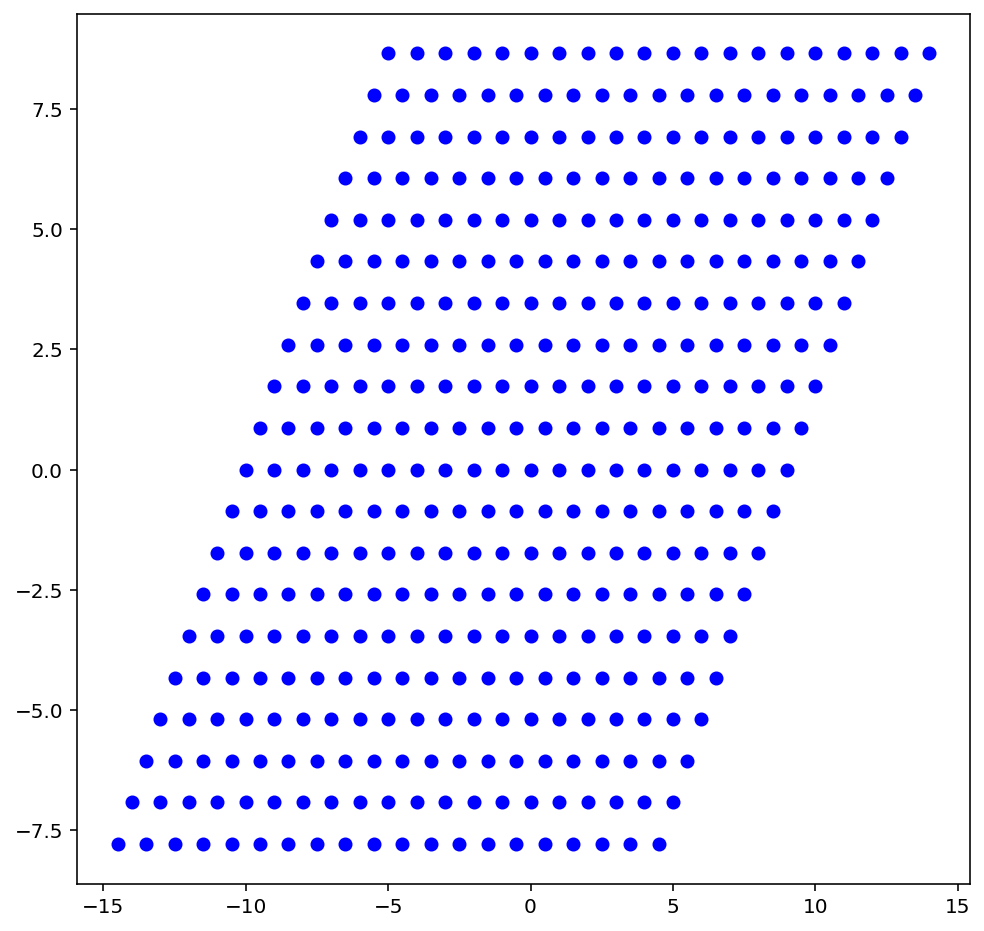

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plotComplex(cplxNums):
    pointArray = []

    for currentPoint in cplxNums:
        pointArray.append([currentPoint.real, currentPoint.imag])

    points = np.array(pointArray)
    # the next lines look a little magic.  LEarn more here: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
    xPoints = points[:,0]
    yPoints = points[:,1]

    plt.figure(figsize=(8,8))
    plt.plot(xPoints, yPoints,'bo')
    plt.show()

# now let's make some points and plot something
gamma = -0.5 - math.sqrt(3)*1j/2
points = []
for i in  range(-10,10):
    for j in range(-10,10):
        points.append(i + j*gamma)

plotComplex(points)

The numbers we plotted here are Eisentstein Integers.  Look them up!  Can you plot Gaussian Integers?  Any other quadratic integers?

OK, back to work.  Let's rotate by Golden Ratio and move out by $\sqrt{n}$ and see what happens.

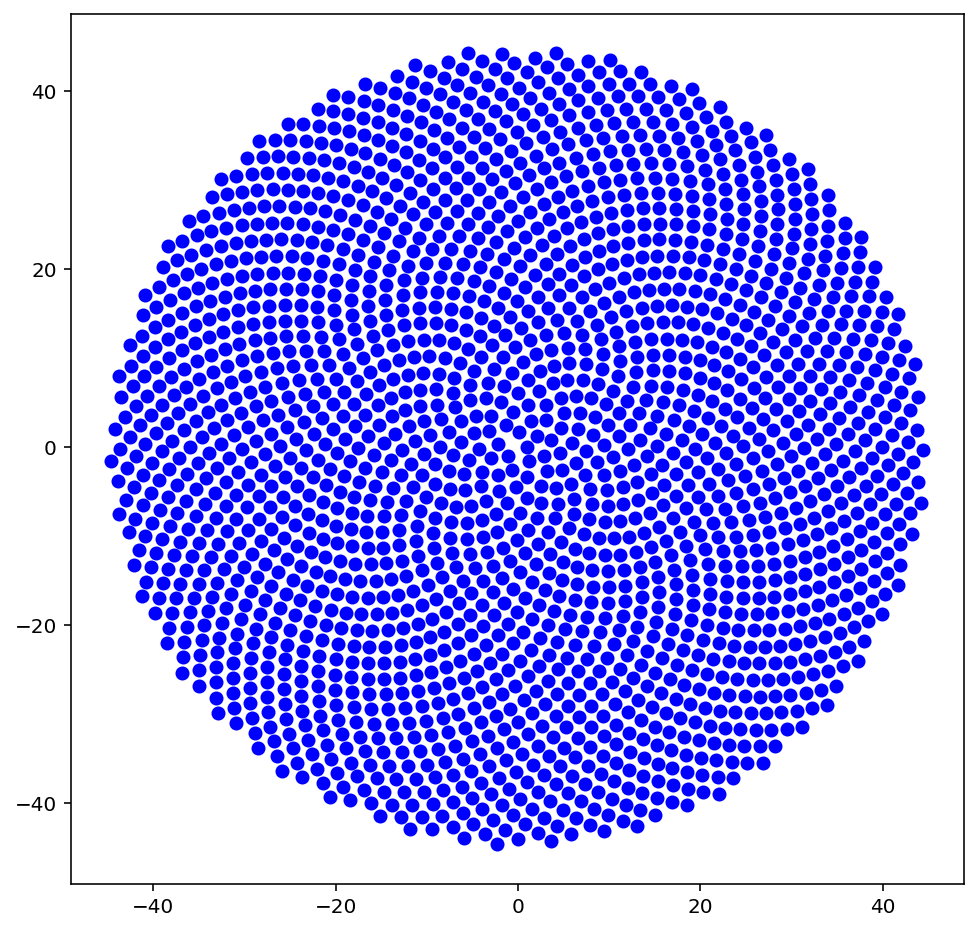

In [4]:
points = []
phi = (1 + math.sqrt(5))/2
rotation = np.exp(2*math.pi*phi*1j)
currentRotation = 1

for n in range(1,2000):
    nextPoint = currentRotation * math.sqrt(n)
    points.append(nextPoint)
    currentRotation = currentRotation * rotation

plotComplex(points)

Does this look familiar? It's not a spiral, but do you see spirals?

Do the following exercises:
* Plot 50 points and mark the clockwise spirals you see. Count them.  Mark the counterclockwise spirals. Count them. (You can save the picture and open it in an image editor to do this).  How many spirals were there in each direction?
* Do the same for 100 points.  Is it different? If so, are the old spirals still there?
* Now 1000 points. Is it different?

It makes it a little easier to see these if we draw the *Voronoi diagram* for the points.  The Voronoi diagram for a set of points comes from asking a simple question: *for any point in the plane, what is the closest point from the set?*  We can think that a point in our set "owns" all of the points that are closer to it that to the other points.  Now we can break the plane into regions owned by points in our list.  Understanding these constructions is part of the field of *Computational Geometry*.

Let's compute the same point set, but now use the scipy `Voronoi` function to compute a Voronoi diagram for us.

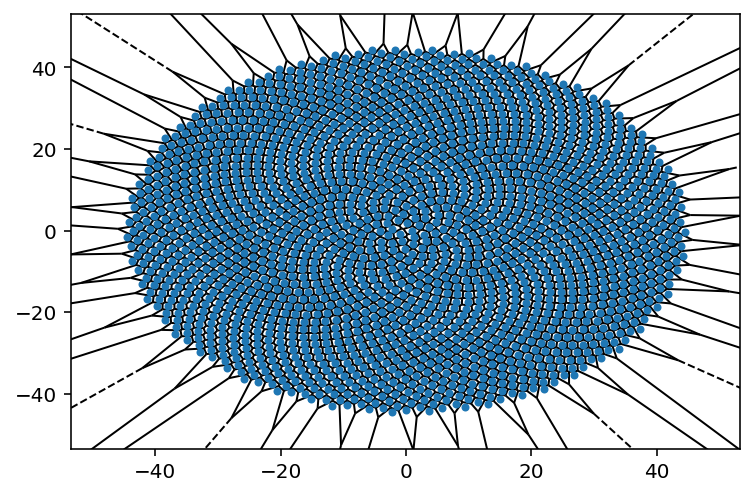

In [5]:

from scipy.spatial import Voronoi, voronoi_plot_2d

def complexToArray(z):
    return [z.real, z.imag]

# map our array of complex number into an array of pairs of points
pointArray = list(map(complexToArray, points))


vor = Voronoi(pointArray)
fig = voronoi_plot_2d(vor, show_vertices=False)
plt.show()


To understand what the Voronoi function does for us a little better, let's take a simpler example with just a few points ant print the whole data structure

In [6]:
smallPoints = []
currentRotation = 1

for i in range(1,9):
    nextPoint = currentRotation * math.sqrt(i)
    smallPoints.append(nextPoint)
    currentRotation = currentRotation * rotation

# map our array of complex number into an array of pairs of points
smallPointArray = list(map(complexToArray, smallPoints))


vor = Voronoi(smallPointArray)
print(vor.points)
print (vor.regions)
print(vor.vertices)
print(vor.point_region)

[[ 1.          0.        ]
 [-1.04279707 -0.95528754]
 [ 0.1514258   1.72541886]
 [ 1.21687772 -1.5872015 ]
 [-2.20188629  0.38948268]
 [ 2.06676994  1.31470986]
 [-0.68684843 -2.55504192]
 [-1.30364193  2.51008321]]
[[3, 1, -1, 2], [], [-1, 0, 2], [8, 4, 5, 6, 7], [8, 3, 1, 4], [5, -1, 1, 4], [6, -1, 5], [7, 0, -1, 6], [8, 3, 2, 0, 7]]
[[-4.18842936e+00 -2.49467403e+00]
 [ 3.00259724e+00 -5.34779956e-01]
 [ 5.89070674e-03 -1.56142920e+00]
 [ 1.85339465e-01 -9.19734512e-01]
 [ 1.01440453e+00  1.07846133e+00]
 [ 2.43431612e+00  7.70022851e+00]
 [-1.08813417e+00  1.16825887e+00]
 [-7.10498582e-01  5.03036683e-01]
 [-4.19346190e-01  3.73331750e-01]]
[4 8 3 0 7 5 2 6]


The `points` are just the points we put in.  What are the vertices and regions?  We'll talk about this in class.

Let's use these structures to color our diagram.

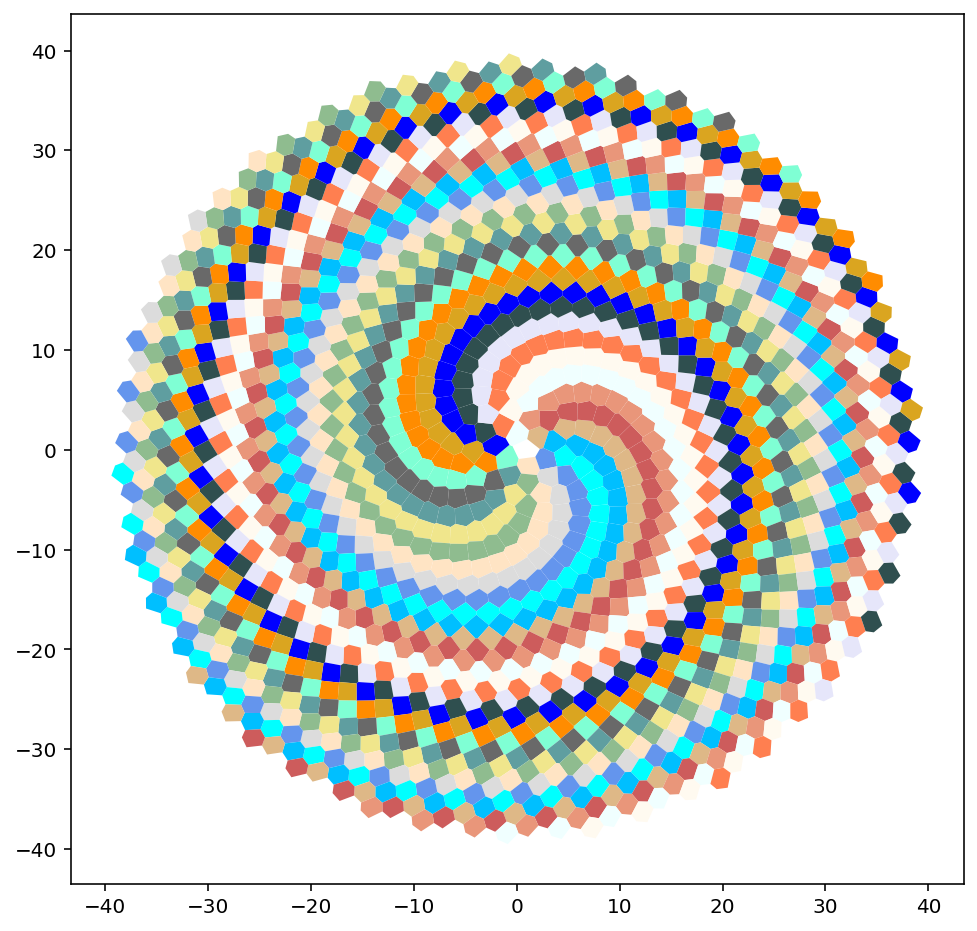

In [7]:
plt.figure(figsize=(8,8))
# let's make a color map with standard HTML color names
colors = ['aqua', 'aquamarine', 'azure','bisque', 'blue', 'burlywood', 'cadetblue', 'coral', 'cornflowerblue','darkorange', 'darksalmon', 'darkseagreen','darkslategray', 'deepskyblue','dimgray', 'floralwhite', 'gainsboro', 'goldenrod', 'indianred', 'khaki', 'lavender', 'lightseagreen', 'lightskyblue','lightslategray', 'lightsteelblue', 'mediumseagreen', 'mediumslateblue','midnightblue', 'Moccasin','navajowhite','navy','oldlace', 'orange', 'peru', 'saddlebrown']

vor = Voronoi(pointArray)
colorModulus = 21

for i  in range(1,1490):
    region = vor.regions[vor.point_region[i]]
    polygon = [vor.vertices[i] for i in region]
    if not -1 in region:
        plt.fill(*zip(*polygon), colors[i%colorModulus])

plt.show()



Play with this!  

Plot more points, like this:

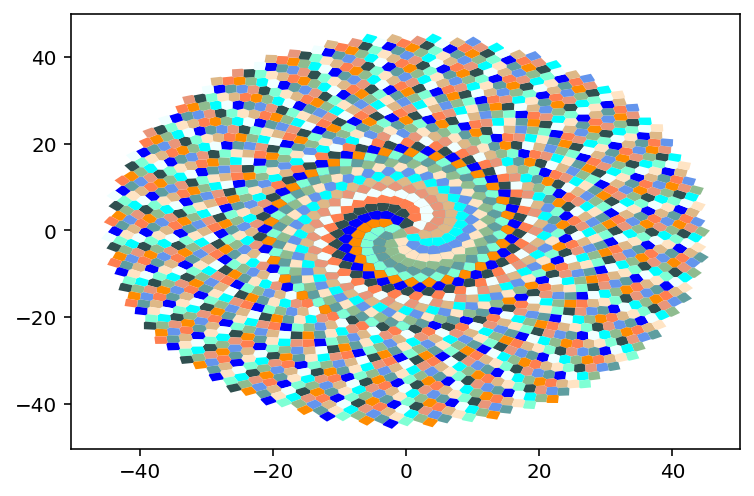

In [8]:
rotation = np.exp(2*math.pi*phi*1j)
currentRotation = 1

for i in range(1,2500):
    nextPoint = currentRotation * math.sqrt(i)
    points.append(nextPoint)
    currentRotation = currentRotation * rotation

# map our array of complex number into an array of pairs of points
pointArray = list(map(complexToArray, points))

vor = Voronoi(pointArray)
colorModulus = 13

for i  in range(1,2490):
    region = vor.regions[vor.point_region[i]]
    polygon = [vor.vertices[i] for i in region]
    if not -1 in region:
        plt.fill(*zip(*polygon), colors[i%colorModulus])

plt.show()

What happens to the spirals?  

Now lets color the same points differently by changing `colorModulus`:

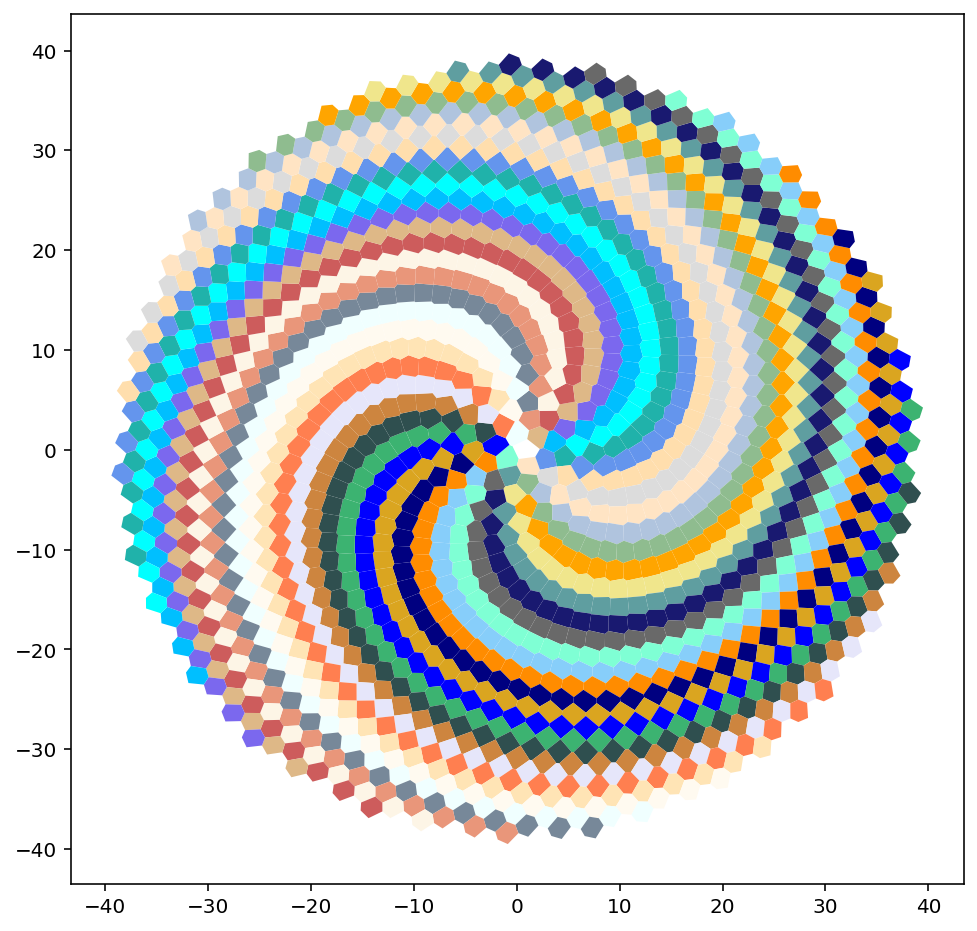

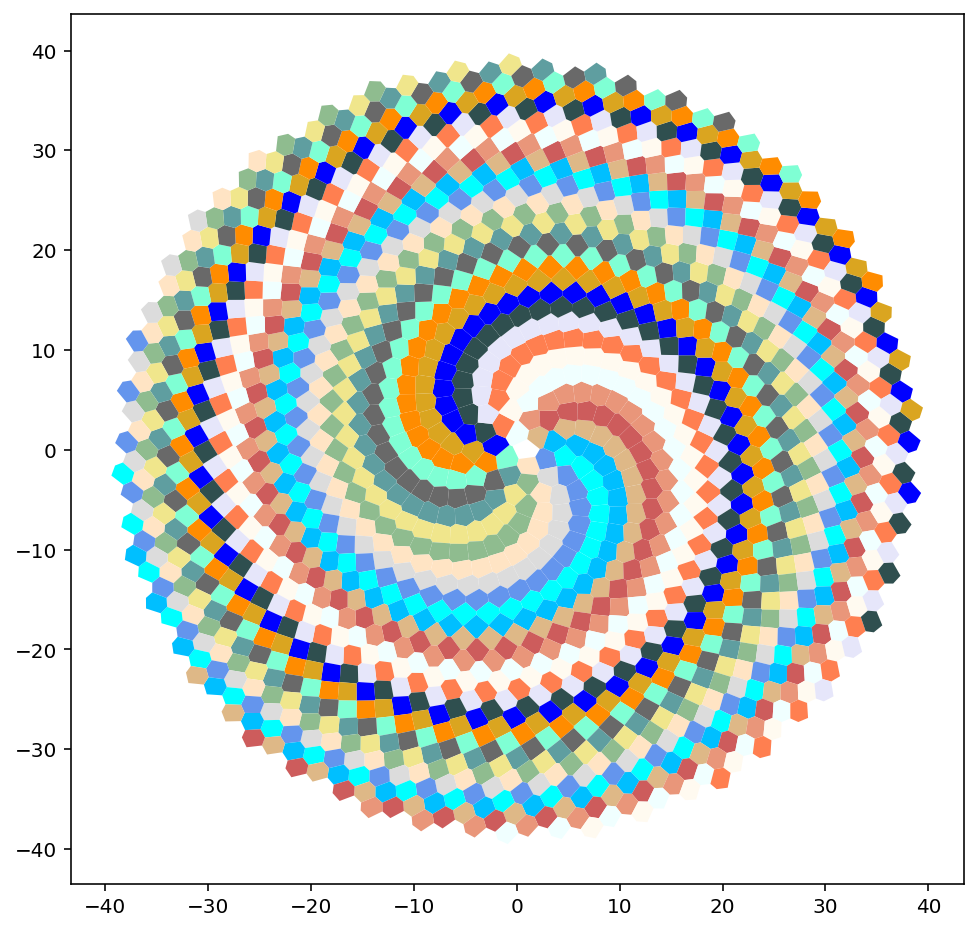

In [9]:
colorModulus = 34
plt.figure(figsize=(8,8))
for i  in range(1,1490):
    region = vor.regions[vor.point_region[i]]
    polygon = [vor.vertices[i] for i in region]
    if not -1 in region:
        plt.fill(*zip(*polygon), colors[i%colorModulus])

plt.show()
plt.figure(figsize=(8,8))
colorModulus = 21
for i  in range(1,1490):
    region = vor.regions[vor.point_region[i]]
    polygon = [vor.vertices[i] for i in region]
    if not -1 in region:
        plt.fill(*zip(*polygon), colors[i%colorModulus])

plt.show()


What can you do with it? Do all color moduli work?  Are some numbers special (like 21 and 34)? DO the spirals degenerate in the middle?  On the outside?

You might need a better way to pick colors!